In [5]:
#import transforms from torchvision
import torchvision.transforms as transforms
import torch

Most transformations accept both PIL images and tensor images, although some transformations are PIL-only and some are tensor-only. The Conversion Transforms may be used to convert to and from PIL images.

Randomized transformations will apply the same transformation to all the images of a given batch, but they will produce different transformations across calls. For reproducible transformations across calls, you may use functional transforms.

In [ ]:
!wget https://github.com/amro-kamal/pytorch-tutorials/blob/main/images/monkey.jpg

In [31]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T

plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open(Path('monkey.jpg'))
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()


### Transforms.compose
To combine multiple trasforms together 

In [3]:
#apply a list of transformation sequentially
transforms.Compose([
     transforms.CenterCrop(100),
     transforms.ToTensor()])

Compose(
    CenterCrop(size=(100, 100))
    ToTensor()
)

## CenterCrop

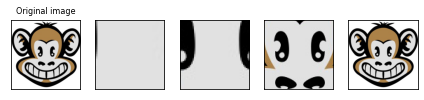

In [34]:
#if the size of the image is smaller than the output size (224 for example), the image is padded with zero before croppping 
# transforms.CenterCrop(244)
center_crops = [T.CenterCrop(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(center_crops)

In [37]:
#The size of the cropped image is 100x100
T.CenterCrop(size=100)(orig_img).size

(100, 100)

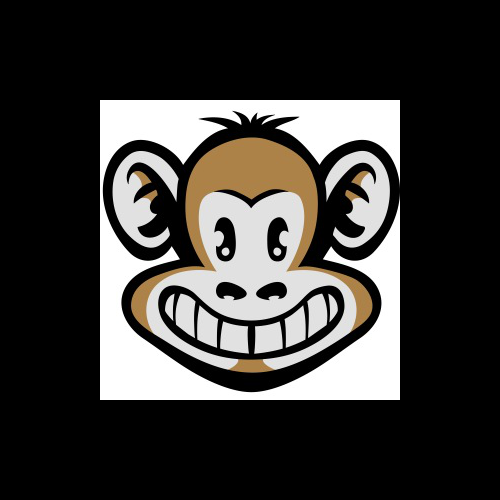

In [42]:
T.CenterCrop(size=500)(orig_img)

## FiveCrop

In [ ]:
transforms.FiveCrop(224)

#get batch from the dataloader
images,labels = batch
#images ==> [bs x 5 x 3 x 224 x 224]
#labels ==> [bs x 1]
C,H,W = images.shape[2] , images.shape[3], images.shape[4]
input = images.view(-1,C,H,W) #[bs*5 x C x H x W] # fuse batch size and ncrops
output = model(input) #[bs*5 x 1]
output=output.view(bs,5,-1) #[bs x 5 x 1]
output_avg = output.mean(1) #[bs x 1] avg the output over the crops dimension 
loss(output_avg , labels)


#ANother idea ==> repeat the labels and treat the different crops as different examples with the same labels
images,labels = batch
#images ==> [bs x 5 x 3 x 224 x 224]
#labels ==> [bs x 1]
input = images.view(-1,C,H,W) #[bs*5 x C x H x W] # fuse batch size and ncrops
labels = labels.repeat(5 , 1) #[bs*5 x 1]
output = model(input) #[bs*5 x 1]
loss(output , labels)


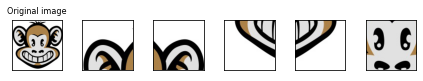

In [38]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(100, 100))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

In [39]:
top_left.size

(100, 100)

In [40]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(500, 500))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

ValueError: ignored

### RandomCrop

torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')

Crop the given image at a random location.

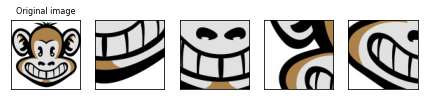

In [43]:
# transforms.Randoncrops(size=224 , pad_if_needed=True)
cropper = T.RandomCrop(size=(100, 100))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

In [44]:
T.RandomCrop(size=(500, 500))(orig_img)


ValueError: ignored

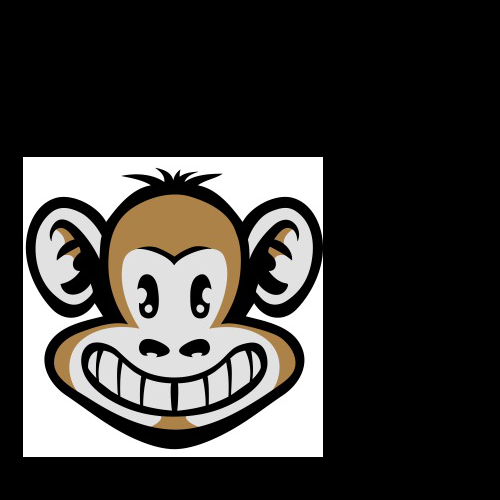

In [45]:
T.RandomCrop(size=(500, 500),pad_if_needed=True)(orig_img)


## RandomRsizedCrop


```
torchvision.transforms.RandomResizedCrop(size=224, 
                                         scale=(0.08, 1.0),
                                         ratio=(0.75,1.33),
                                         interpolation=<InterpolationMode.BILINEAR: 'bilinear'>)


Crop a random portion of image and resize it to a given size.
A crop of the original image is made: the crop has a random area (H * W) and a random aspect ratio. 
This crop is finally resized to the given size. This is popularly used to train the Inception networks.

scale =(0.08 ,1.0) : (the percentage of area to crop) – Specifies the lower and upper bounds for the 
random area of the crop, before resizing.
The scale is defined with respect to the area 
of the original image. For example :crop 0.65 from the image area ==> resize to the output size
ratio: (tuple of python:float) – lower and upper 
bounds for the random aspect ratio of the crop, before resizing.


```

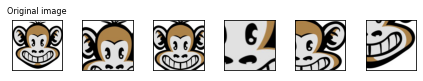

In [51]:
resized_crops = [resize_cropper(orig_img) for _ in range(5)]
plot(resized_crops)

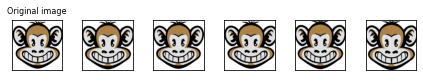

In [52]:
resize_cropper = T.RandomResizedCrop(size=(224, 224), scale =(0.9 ,1.0))
resized_crops = [resize_cropper(orig_img) for _ in range(5)]
plot(resized_crops)

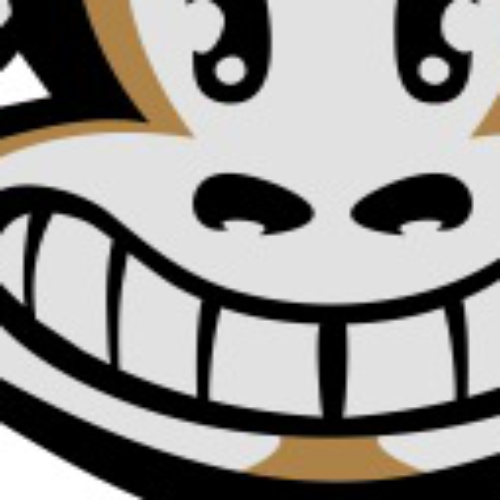

In [48]:
T.RandomResizedCrop(size=(500, 500))(orig_img)

### Resize

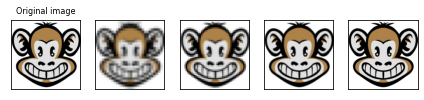

In [32]:
#Resize the input image to the given size
# transforms.Rsize(224)

resized_imgs = [T.Resize(size=size)(orig_img) for size in (30, 50, 100, orig_img.size)]
plot(resized_imgs)


##Pad
 ```
The Pad transform (see also pad()) fills image borders with some pixel values.
```



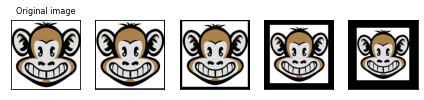

In [33]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

## RandomRotation

In [ ]:
transforms.RandomRotation((10,50))

### RandomHerizontalFlip & RandomVerticalFlip

In [ ]:
# flip the given image randomly with a given probability
transforms.RandomHorizontalFlip(p=0.5)
transforms.RandomVerticalFlip(p=0.5)

## RandomChoice & RandomOrder & RandomApply


```
RandomChooice : apply one transformation from a list of transformations 

RamdomOrder : apply a list of trasformations in random order

RandomApply : apply a list of transformations randdomly with probability p
```



In [ ]:
transforms_list=[transforms.Resize(224) , transforms.RandomHorizontalFlip(p=.4) , transforms.RandomRotation(30)]
torchvision.transforms.RandomChoice(transforms_list)
torchvision.transforms.RandomOrder(transforms_list)
torchvision.transforms.RandomApply(transforms_list , p=0.5)

#if on of the transformations doesn't accept p , wrap it with RandomApply
transforms.RandomApply( [transforms.RandomRotation(30)] , p=0.3)

## Normalize



```
torchvision.transforms.Normalize(mean, std, inplace=False)

Normalizes each channel separately.
Normalize a tensor image with mean and standard deviation. 
This transform does not support PIL Image.
Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, 
this transform will normalize each channel of the input torch.

 i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]
```



### ToTensor()

```
torchvision.transforms.ToTensor()

Convert a PIL Image or numpy.ndarray to tensor
```



## Lambda(lmbda)



```
torchvision.transforms.Lambda(lambd)

Apply a user-defined lambda as a transform
```



In [59]:
tensor_img.mean()

tensor(0.6326)

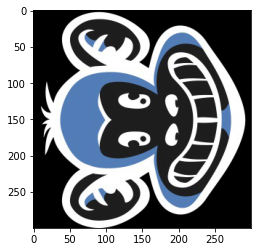

In [72]:
tensor_img = T.ToTensor()(orig_img)
black_img= T.Lambda(lambda img: 1-img)(tensor_img)
plt.imshow((black_img.permute(2, 1, 0)))


## Custom transforms class

In [ ]:
class myTransform:
    def __init__(self):
        self.transform = transforms.Compose([
            transforms.RandomResizedCrop(224, interpolation=Image.BICUBIC),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomApply(
                [transforms.ColorJitter(brightness=0.4, contrast=0.4,
                                        saturation=0.2, hue=0.1)],
                p=0.8
            ),
            transforms.ToTensor(),
            transforms.Normalize(
                    mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))
        ])
        self.transform_prime = transforms.Compose([
            transforms.RandomResizedCrop(224, interpolation=Image.BICUBIC),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomApply(
                [transforms.ColorJitter(brightness=0.4, contrast=0.4,
                                        saturation=0.2, hue=0.1)],
                p=0.8
            ),
            transforms.RandomGrayscale(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize( mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))

        ])

    def __call__(self, x):
        y1 = self.transform(x)
        y2 = self.transform_prime(x)
        return y1, y2

#how to use it?
my_transforms = myTransform()
dataset = torchvision.datasets.CIFAR10(train=True , tranforms=my_transforms)
dataloader = torch.DataLoader(dataset , batch_size=64)

for (images1,images2),targets in dataloader:
  model(images1)
  model(images2)
